# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#OpenWeather Key
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=9aba8f52f775591a856db4c786f81bb8&units=imperial&q=


In [4]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | matagami
Processing Record 2 of Set 1 | moron
Processing Record 3 of Set 1 | hermanus
City not found. Skipping...
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | phuket
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | ostrovnoy
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | lorengau
Processing Record 13 of Set 1 | thinadhoo
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | barraute
City not found. Skipping...
Processing Record 16 of Set 1 | grants pass
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | concepcion
Processing Record 20 of Set 1 | nileshwar
Processing Record 21 of Set 1 | brindisi
Processing Record 22 of Set 1 | tecoanapa
Processing Record 23 of Set 1 | b

Processing Record 41 of Set 4 | puqi
Processing Record 42 of Set 4 | newport
Processing Record 43 of Set 4 | whitehorse
Processing Record 44 of Set 4 | hemsedal
Processing Record 45 of Set 4 | bilibino
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 46 of Set 4 | contai
Processing Record 47 of Set 4 | porto novo
Processing Record 48 of Set 4 | torbay
Processing Record 49 of Set 4 | dudinka
Processing Record 1 of Set 5 | napa
Processing Record 2 of Set 5 | chibombo
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | aklavik
Processing Record 5 of Set 5 | tongzi
Processing Record 6 of Set 5 | marystown
Processing Record 7 of Set 5 | ketegyhaza
Processing Record 8 of Set 5 | tessalit
City not found. Skipping...
Processing Record 9 of Set 5 | urucara
Processing Record 10 of Set 5 | bafoulabe
Processing Record 11 of Set 5 | rio gallegos
Processing Record 12 of Set 5 | barrow
Processing Record 13 of Set 5 | revda
City no

Processing Record 29 of Set 8 | klaksvik
Processing Record 30 of Set 8 | romitan
Processing Record 31 of Set 8 | ofaqim
Processing Record 32 of Set 8 | ngunguru
Processing Record 33 of Set 8 | lerwick
Processing Record 34 of Set 8 | ossora
Processing Record 35 of Set 8 | bira
Processing Record 36 of Set 8 | talara
Processing Record 37 of Set 8 | kushiro
City not found. Skipping...
Processing Record 38 of Set 8 | nioro
City not found. Skipping...
Processing Record 39 of Set 8 | oussouye
Processing Record 40 of Set 8 | bocanda
Processing Record 41 of Set 8 | sacramento
Processing Record 42 of Set 8 | zhuanghe
Processing Record 43 of Set 8 | mvuma
Processing Record 44 of Set 8 | comodoro rivadavia
City not found. Skipping...
Processing Record 45 of Set 8 | harper
Processing Record 46 of Set 8 | lillooet
Processing Record 47 of Set 8 | poltavka
Processing Record 48 of Set 8 | broome
Processing Record 49 of Set 8 | sitka
City not found. Skipping...
Processing Record 1 of Set 9 | abnub
Proce

City not found. Skipping...
City not found. Skipping...
Processing Record 15 of Set 12 | kyra
Processing Record 16 of Set 12 | bosaso
------------------------------
Data Retrieval Complete
------------------------------


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | darhan
Processing Record 3 of Set 1 | tarakan
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | jiuquan
Processing Record 7 of Set 1 | sesheke
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | clarence town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | salym
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | arys
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | rio gallegos
Processing Record 22 of Set 1 | kropotkin
Processing Record 23 of Set 1 | but

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

In [13]:
weather_dataframe = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_dataframe.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,matagami,90,CA,1586462561,90,49.75,-77.63,33.80,5.82
1,moron,40,AR,1586462561,52,-34.65,-58.62,72.00,6.93
2,hermanus,75,ZA,1586462562,93,-34.42,19.23,63.00,4.41
3,severo-kurilsk,93,RU,1586462562,93,50.68,156.12,29.66,0.18
4,kaitangata,71,NZ,1586462562,69,-46.28,169.85,53.01,1.01
5,phuket,20,TH,1586462551,88,8.00,98.25,78.80,2.24
6,qaanaaq,100,GL,1586462563,87,77.48,-69.36,12.70,3.83
7,ribeira grande,75,ES,1586462563,100,42.75,-8.44,63.00,5.82
8,ostrovnoy,100,RU,1586462563,93,68.05,39.51,21.09,10.78
9,ushuaia,23,AR,1586462422,39,-54.80,-68.30,66.20,5.82


In [11]:
weather_dataframe.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

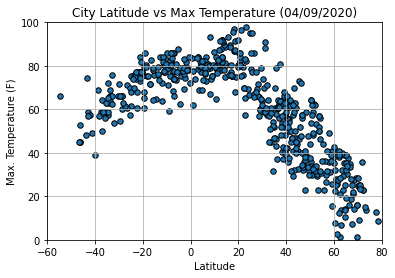

In [17]:
#Create a Scatter Plot for Lattitude vs Temperature of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature (04/09/2020)")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS TEMP.png")

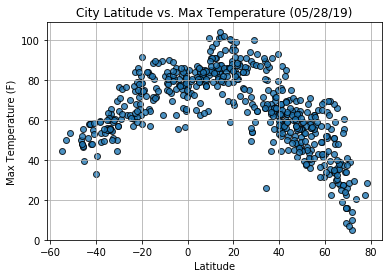

#### Latitude vs. Humidity Plot

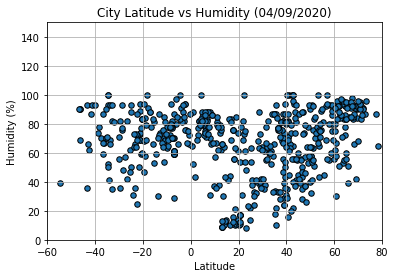

In [22]:
#Create a Scatter Plot for Lattitude vs Humidity of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity (04/09/2020)")

plt.ylim(0,150)
plt.xlim(-60, 80)

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS HUM.png")

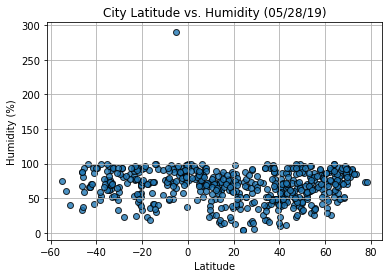

#### Latitude vs. Cloudiness Plot

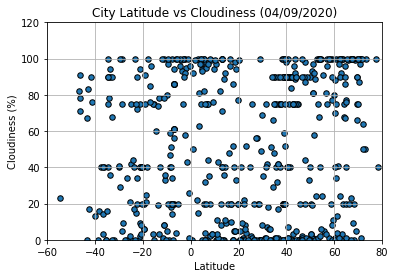

In [24]:
#Create a Scatter Plot for Lattitude vs Cloudiness of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness (04/09/2020)")

plt.ylim(0,120)
plt.xlim(-60, 80)

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS cloudiness.png")

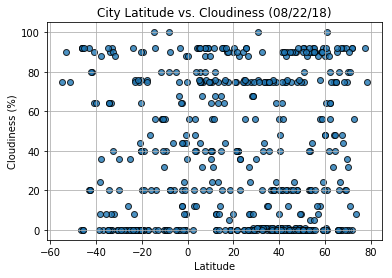

#### Latitude vs. Wind Speed Plot

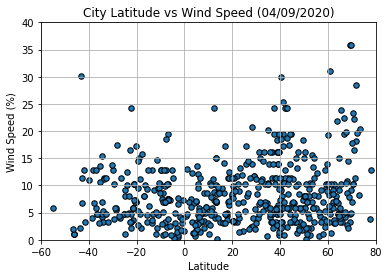

In [27]:
#Create a Scatter Plot for Lattitude vs Wind Speed of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed (04/09/2020)")

plt.ylim(0,40)
plt.xlim(-60, 80)

plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS Wind Speed.png")

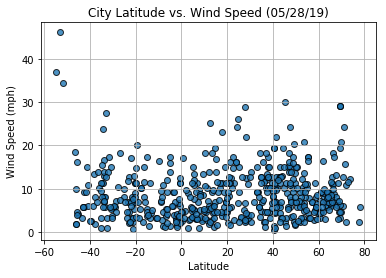

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [28]:
def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(file_name)

In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


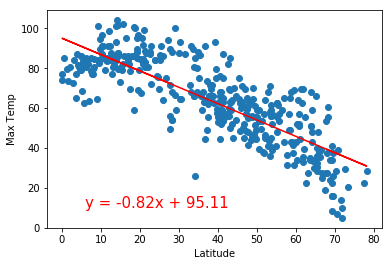

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


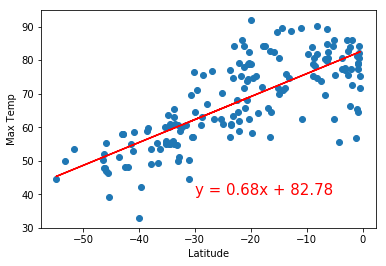

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


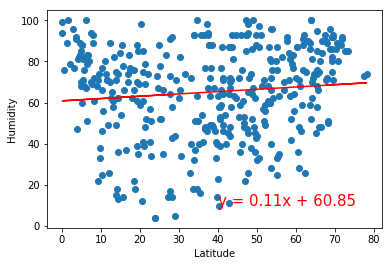

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


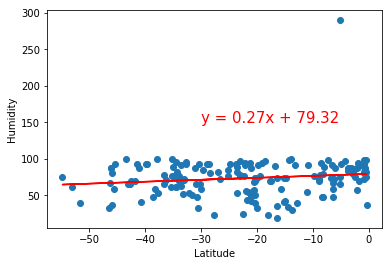

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


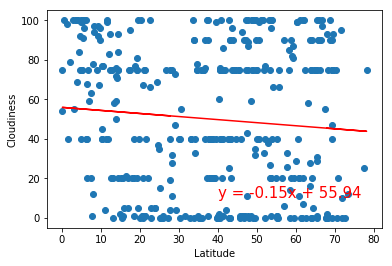

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


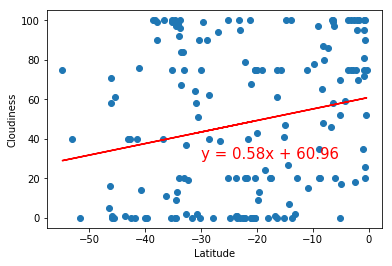

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


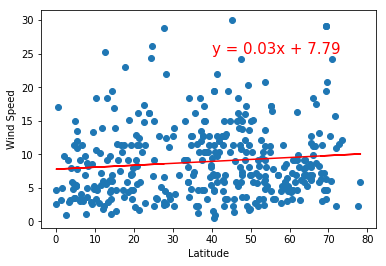

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


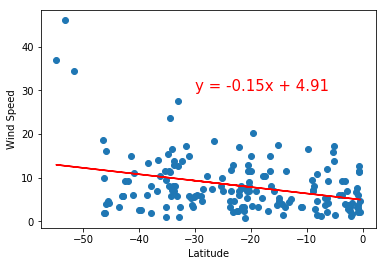